## Observations and Insights 

In [1]:
print("Conclusions based on the data: 1. The test group was evenly selected with a slightly higher amount of males over female mice and 25 mice per drug regimen with the exceptions of Propriva and Stelasyn. 2. Capomulin was largely successful at reducing the tumor volume in mice over time. 3. For the group using Capomulin, results showed that the heavier the mouse the larger the volume of the tumor on average.")

Conclusions based on the data: 1. The test group was evenly selected with a slightly higher amount of males over female mice and 25 mice per drug regimen with the exceptions of Propriva and Stelasyn. 2. Capomulin was largely successful at reducing the tumor volume in mice over time. 3. For the group using Capomulin, results showed that the heavier the mouse the larger the volume of the tumor on average.


In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

In [3]:


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
all_data = pd.merge(mouse_metadata,study_results,how='inner')

# Display the data table for preview
all_data 

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Unnamed: 4
0,k403,Ramicane,Male,21,16,0,45.000000,0,k4030
1,k403,Ramicane,Male,21,16,5,38.825898,0,k4035
2,k403,Ramicane,Male,21,16,10,35.014271,1,k40310
3,k403,Ramicane,Male,21,16,15,34.223992,1,k40315
4,k403,Ramicane,Male,21,16,20,32.997729,1,k40320
...,...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2,z96925
1889,z969,Naftisol,Male,9,30,30,65.841013,3,z96930
1890,z969,Naftisol,Male,9,30,35,69.176246,4,z96935
1891,z969,Naftisol,Male,9,30,40,70.314904,4,z96940


In [4]:
# Checking the number of mice.
mice = len(pd.unique(all_data["Mouse ID"]))
print(mice)

249


In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = all_data[all_data.duplicated(['Mouse ID','Timepoint'])]
print(duplicates["Mouse ID"])

909    g989
911    g989
913    g989
915    g989
917    g989
Name: Mouse ID, dtype: object


In [6]:
# Optional: Get all the data for the duplicate mouse ID. 


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = all_data.drop(all_data.loc[all_data["Mouse ID"] == "g989"].index)
cleaned_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Unnamed: 4
0,k403,Ramicane,Male,21,16,0,45.000000,0,k4030
1,k403,Ramicane,Male,21,16,5,38.825898,0,k4035
2,k403,Ramicane,Male,21,16,10,35.014271,1,k40310
3,k403,Ramicane,Male,21,16,15,34.223992,1,k40315
4,k403,Ramicane,Male,21,16,20,32.997729,1,k40320
...,...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2,z96925
1889,z969,Naftisol,Male,9,30,30,65.841013,3,z96930
1890,z969,Naftisol,Male,9,30,35,69.176246,4,z96935
1891,z969,Naftisol,Male,9,30,40,70.314904,4,z96940


In [8]:
# Checking the number of mice in the clean DataFrame.
cleaned_mice = len(pd.unique(cleaned_df["Mouse ID"]))
cleaned_mice

248

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

drugreg_group = cleaned_df.groupby(["Drug Regimen"])
drug_mean = drugreg_group["Tumor Volume (mm3)"].mean()
drug_median = drugreg_group["Tumor Volume (mm3)"].median()
drug_std = drugreg_group["Tumor Volume (mm3)"].std()
drug_sem = drugreg_group["Tumor Volume (mm3)"].sem()
stat_df= pd.DataFrame({"Average Tumor Volume": drug_mean, "Median Tumor Volume":drug_median, "STD of Tumor Volume": drug_std,"SEM of Tumor Volume":drug_sem})
stat_df

,Average Tumor Volume,Median Tumor Volume,STD of Tumor Volume,SEM of Tumor Volume
Drug Regimen,,,,
Capomulin,40.675741,41.557809,4.994774,0.329346
Ceftamin,52.591172,51.776157,6.268188,0.469821
Infubinol,52.884795,51.820584,6.567243,0.492236
Ketapril,55.235638,53.698743,8.279709,0.603860
Naftisol,54.331565,52.509285,8.134708,0.596466
Placebo,54.033581,52.288934,7.821003,0.581331
Propriva,52.320930,50.446266,6.622085,0.544332
Ramicane,40.216745,40.673236,4.846308,0.320955
Stelasyn,54.233149,52.431737,7.710419,0.573111


In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
cleaned_df.groupby(["Drug Regimen"]).agg(
    Average_Tumor_Volume= pd.NamedAgg(column= "Tumor Volume (mm3)",aggfunc="mean"),
    Median_Tumor_Volume= pd.NamedAgg(column= "Tumor Volume (mm3)",aggfunc="median"),
    STD_of_Tumor_Volume= pd.NamedAgg(column= "Tumor Volume (mm3)",aggfunc="std"),
    SEM_of_Tumor_Volume= pd.NamedAgg(column= "Tumor Volume (mm3)",aggfunc="sem"))



,Average_Tumor_Volume,Median_Tumor_Volume,STD_of_Tumor_Volume,SEM_of_Tumor_Volume
Drug Regimen,,,,
Capomulin,40.675741,41.557809,4.994774,0.329346
Ceftamin,52.591172,51.776157,6.268188,0.469821
Infubinol,52.884795,51.820584,6.567243,0.492236
Ketapril,55.235638,53.698743,8.279709,0.603860
Naftisol,54.331565,52.509285,8.134708,0.596466
Placebo,54.033581,52.288934,7.821003,0.581331
Propriva,52.320930,50.446266,6.622085,0.544332
Ramicane,40.216745,40.673236,4.846308,0.320955
Stelasyn,54.233149,52.431737,7.710419,0.573111


## Bar and Pie Charts

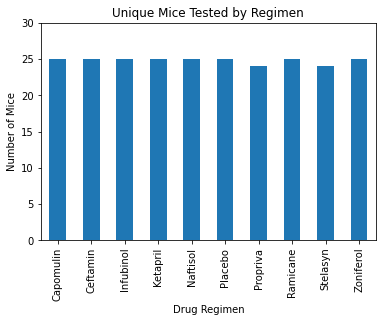

In [11]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
unique_mice = drugreg_group["Mouse ID"].nunique()
drugs= drugreg_group["Drug Regimen"].unique().str[0]

uniquemouse_chart = unique_mice.plot.bar(x=drugs,y=unique_mice,title="Unique Mice Tested by Regimen",xlim=(-0.75, len(drugs)-0.25),ylim=(0, max(unique_mice)+5), rot=90)
uniquemouse_chart.set_xlabel("Drug Regimen")
uniquemouse_chart.set_ylabel("Number of Mice")

uniquemouse_chart = uniquemouse_chart


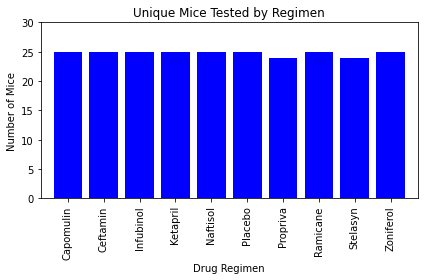

In [12]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
import numpy as np

x_axis =np.arange(len(unique_mice))
drugs= drugreg_group["Drug Regimen"].unique().str[0]

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations,drugs,rotation='vertical')
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(unique_mice)+5)

plt.bar(x_axis,unique_mice,color="b",align="center")

plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")

plt.title("Unique Mice Tested by Regimen")
plt.tight_layout()

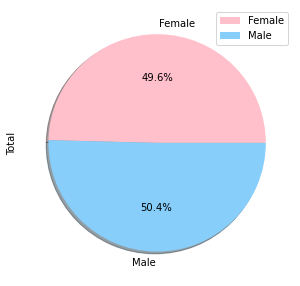

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_group= cleaned_df.groupby(["Sex"])
gender_count = gender_group["Mouse ID"].nunique()
genders = gender_group["Sex"].unique().str[0]
gender_df = pd.DataFrame({'Gender': genders, 'Total': gender_count})
colors = ["pink","lightskyblue"]
gender_pie= gender_df.plot.pie(y= 'Total',figsize = (5,5),colors=colors,shadow= True,autopct='%1.1f%%')


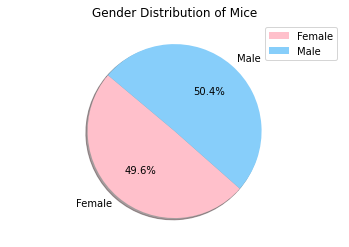

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
colors = ["pink","lightskyblue"]
plt.axis("equal")
plt.title("Gender Distribution of Mice")
plt.pie(gender_count, labels=genders, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.legend()
plt.show()

## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse

drug_df= cleaned_df.set_index("Drug Regimen")
drug_df= drug_df.loc[["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]]
max_time=int(drug_df["Timepoint"].max())
drug_df= drug_df.loc[drug_df["Timepoint"]==max_time]
quartile_group = drug_df.groupby(["Drug Regimen","Mouse ID"])

total_volume= quartile_group["Tumor Volume (mm3)"].unique().str[0]




# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
new_df= pd.DataFrame({"Final Volume": total_volume})
updatedcleaned_df = pd.merge(cleaned_df,new_df,on=["Drug Regimen","Mouse ID"])
updatedcleaned_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Unnamed: 4,Final Volume
0,k403,Ramicane,Male,21,16,0,45.000000,0,k4030,22.050126
1,k403,Ramicane,Male,21,16,5,38.825898,0,k4035,22.050126
2,k403,Ramicane,Male,21,16,10,35.014271,1,k40310,22.050126
3,k403,Ramicane,Male,21,16,15,34.223992,1,k40315,22.050126
4,k403,Ramicane,Male,21,16,20,32.997729,1,k40320,22.050126
...,...,...,...,...,...,...,...,...,...,...
625,z581,Infubinol,Female,24,25,25,54.316407,2,z58125,62.754451
626,z581,Infubinol,Female,24,25,30,56.286750,2,z58130,62.754451
627,z581,Infubinol,Female,24,25,35,58.628399,3,z58135,62.754451
628,z581,Infubinol,Female,24,25,40,60.053740,3,z58140,62.754451


In [16]:
# Put treatments into a list for for loop (and later for plot labels)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Create empty list to fill with tumor vol data (for plotting)
# Locate the rows which contain mice on each drug and get the tumor volumes
# add subset 
# Determine outliers using upper and lower bounds

treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

tumors=[]

for treatment in treatments:

    tumors = cleaned_df.loc[cleaned_df["Drug Regimen"].isin(treatments)]
    
quartiles = tumors['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

outliers = tumors.loc[(tumors['Tumor Volume (mm3)'] < lower_bound) | (tumors['Tumor Volume (mm3)'] > upper_bound)]
outliers


    

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Unnamed: 4
8,k403,Ramicane,Male,21,16,40,24.365505,1,k40340
9,k403,Ramicane,Male,21,16,45,22.050126,1,k40345
19,s185,Capomulin,Female,3,17,45,23.343598,1,s18545
463,a203,Infubinol,Female,20,23,45,67.973419,2,a20345
540,a685,Infubinol,Male,8,30,45,66.083066,3,a68545
635,c139,Infubinol,Male,11,28,35,67.821420,1,c13935
636,c139,Infubinol,Male,11,28,40,69.428141,2,c13940
637,c139,Infubinol,Male,11,28,45,72.226731,2,c13945
949,i386,Infubinol,Female,23,29,40,67.289621,4,i38640
1032,k210,Ceftamin,Male,15,28,40,66.622836,2,k21040


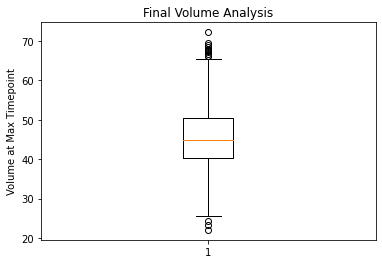

In [17]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title('Final Volume Analysis')
ax1.set_ylabel('Volume at Max Timepoint')
ax1.boxplot(tumors['Tumor Volume (mm3)'])
plt.show()

## Line and Scatter Plots

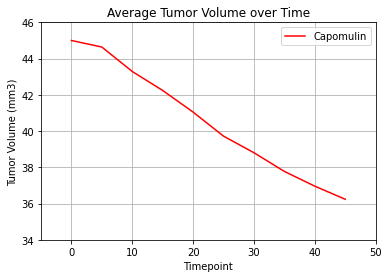

In [18]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_df=updatedcleaned_df.loc[(updatedcleaned_df['Drug Regimen'] == "Capomulin")]
capomulin_group= capomulin_df.groupby(['Drug Regimen',"Timepoint"])
time = capomulin_group["Timepoint"].unique().str[0]
tumor = capomulin_group["Tumor Volume (mm3)"].mean()

plt.title("Average Tumor Volume over Time")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")

plt.xlim(-5,50)
plt.ylim(34,46)

capomulinplot, = plt.plot(time,tumor,color="red",label="Capomulin")                                   
plt.legend(handles=[capomulinplot], loc="best")
plt.grid()
plt.show()

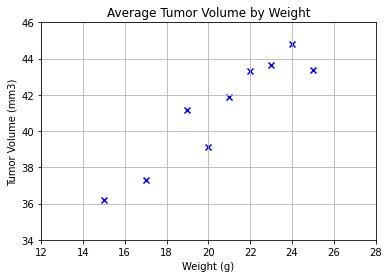

In [19]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_group2= capomulin_df.groupby(['Drug Regimen',"Weight (g)"])
weight = capomulin_group2["Weight (g)"].unique().str[0]
tumor = capomulin_group2["Tumor Volume (mm3)"].mean()
plt.ylim(34,46)
plt.xlim(12,28)

plt.title("Average Tumor Volume by Weight")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.scatter(weight, tumor, marker="x", facecolors="blue", edgecolors="black")
plt.grid()
plt.show()

## Correlation and Regression

In [20]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
from scipy.stats import linregress
correlation = st.pearsonr(weight,tumor)
(slope, intercept, rvalue, pvalue, stderr) = linregress(weight, tumor)
regress_values = weight * slope + intercept
line = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

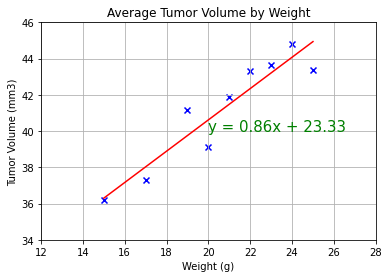

In [21]:
plt.title("Average Tumor Volume by Weight")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.scatter(weight, tumor, marker="x", facecolors="blue", edgecolors="black")
plt.plot(weight,regress_values,"r-")
plt.annotate(line,(20,40),fontsize=15,color="green")
plt.ylim(34,46)
plt.xlim(12,28)
plt.grid()
plt.show()